# Machine Learning Engineer Nanodegree
## Using Supervised Classification Algorithms to Predict Bank Term Deposit Subscription
Fabiano Shoji Yoschitaki  
July 8th, 2018

## Visualizations

Here are some visualizations to help me understand data.

-----------
### 1. Data and Library Loading
In this section, we will load the dataset and the libraries used in the project.  

#### 1.1. Library Loading
Loading all libraries needed for the project.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

#### 1.2. Data Loading
Loading the dataset from the CSV file.

In [2]:
bank_full_data = pd.read_csv('bank-full.csv', delimiter=';')
print("Bank dataset was loaded successfully!")
bank_yes_subscribed = bank_full_data[bank_full_data['y'] == 'yes']
bank_no_subscribed = bank_full_data[bank_full_data['y'] == 'no']

Bank dataset was loaded successfully!


-----------
### 2. Data Visualization

- Bank client features:
    - **age**: the age of the client (numeric).
    - **job**: the type of job of the client (categorical). Possible values: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'.
    - **marital**: the marital status of the client (categorical). Possible values: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed.
    - **education**: the education level of the client (categorical). Possible values: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'.
    - **default**: whether or not the client has credit in default (categorical). Possible values: 'no','yes','unknown'.
    - **balance**: average yearly balance in Euros (numeric).
    - **housing**: whether or not the client has housing loan (categorical). Possible values: 'no','yes','unknown'.
    - **loan**: whether or not the client has personal loan (categorical). Possible values: 'no','yes','unknown'.


- Features related with the last contact of the current campaign:
    - **contact**: contact communication type (categorical). Possible values: 'cellular','telephone'. 
    - **day**: last contact day of the month (numeric).
    - **month**: last contact month of year (categorical). Possible values: 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'.
    - **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


- Other features:
    - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact).
    - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted).
    - **previous**: number of contacts performed before this campaign and for this client (numeric).
    - **poutcome**: outcome of the previous marketing campaign (categorical). Possible values: 'failure','nonexistent','success'.


- Target label:
    - **y**: whether or not the client subscribed to a term deposit (categorical). Possible values: 'yes', 'no'. 
    
Displaying the first 10 rows of the dataset below:

![First 10 rows of the dataset](images/first10row.png)

Here we will apply some methods/techniques for Exploratory Data Analysis to better understand the data.

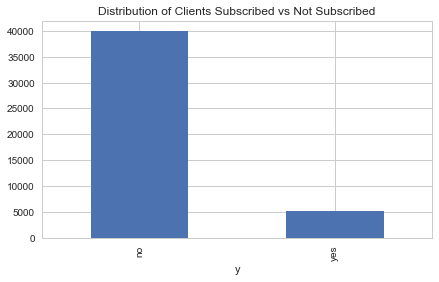

In [26]:
plt.figure(figsize=(7, 4))
plt.title("Distribution of Clients Subscribed vs Not Subscribed")
bank_full_data.groupby("y")['y'].count().plot.bar()

Text(0,0.5,'Percentage')

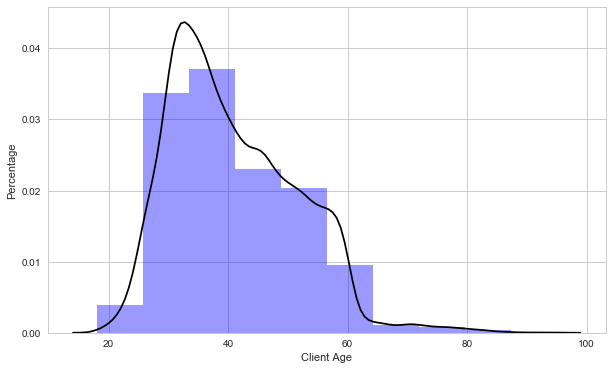

In [23]:
age_histogram = sns.distplot(
    bank_full_data['age'],
    hist_kws={'color': 'blue'},
    kde_kws={'color': 'black'}, 
    bins=10)
age_histogram.figure.set_size_inches(10, 6)
age_histogram.set_xlabel('Client Age')
age_histogram.set_ylabel('Percentage')

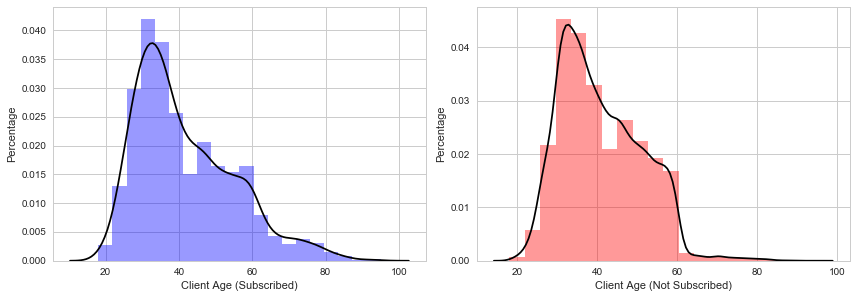

In [29]:
fig = plt.figure(figsize=(12, 12))

age_histogram_subscribed = fig.add_subplot(321)
sns.distplot(
    bank_yes_subscribed['age'], 
    hist_kws={'color': 'blue'},
    kde_kws={'color': 'black'},
    bins=20)
age_histogram_subscribed.set_xlabel('Client Age (Subscribed)')
age_histogram_subscribed.set_ylabel('Percentage')

age_histogram_not_subscribed = fig.add_subplot(322)
sns.distplot(
    bank_no_subscribed['age'], 
    hist_kws={'color': 'red'},
    kde_kws={'color': 'black'},
    bins=20)
age_histogram_not_subscribed.set_xlabel('Client Age (Not Subscribed)')
age_histogram_not_subscribed.set_ylabel('Percentage')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

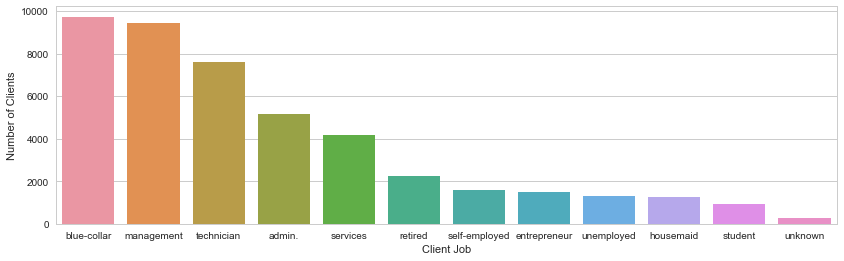

In [31]:
job_histogram = sns.countplot(
    x='job', 
    data=bank_full_data, 
    order=bank_full_data['job'].value_counts().index)
job_histogram.figure.set_size_inches(14, 4)
job_histogram.set_xlabel('Client Job')
job_histogram.set_ylabel('Number of Clients')

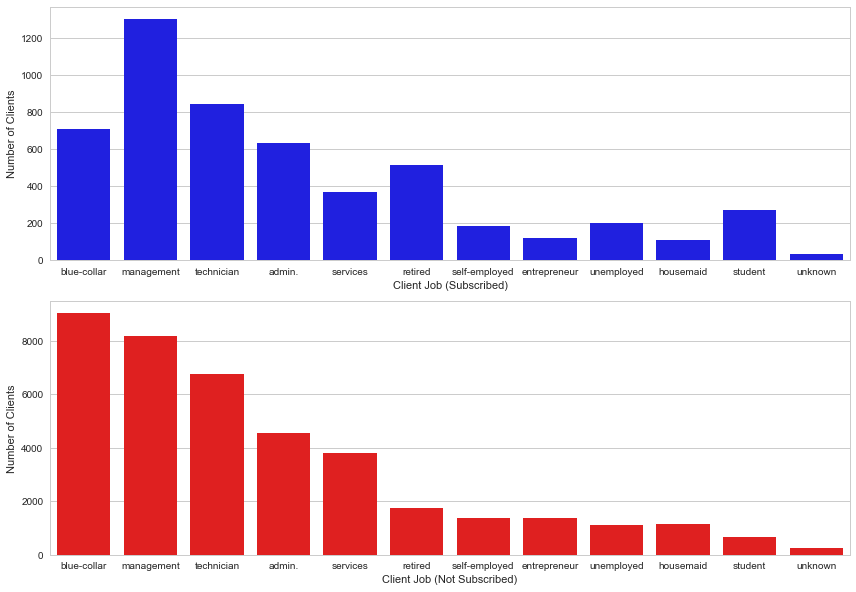

In [33]:
fig = plt.figure(figsize=(12, 12))

job_histogram_subscribed = fig.add_subplot(311)
sns.countplot(
    x='job', 
    data=bank_yes_subscribed, 
    color='blue',
    order=bank_full_data['job'].value_counts().index)
job_histogram_subscribed.set_xlabel('Client Job (Subscribed)')
job_histogram_subscribed.set_ylabel('Number of Clients')

job_histogram_not_subscribed = fig.add_subplot(312)
sns.countplot(
    x='job', 
    data=bank_no_subscribed, 
    color='red',    
    order=bank_full_data['job'].value_counts().index)
job_histogram_not_subscribed.set_xlabel('Client Job (Not Subscribed)')
job_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

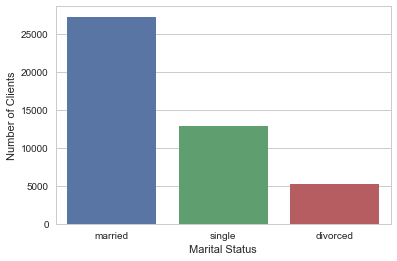

In [8]:
marital_histogram = sns.countplot(
    x='marital', 
    data=bank_full_data, 
    order=bank_full_data['marital'].value_counts().index)
marital_histogram.figure.set_size_inches(6, 4)
marital_histogram.set_xlabel('Marital Status')
marital_histogram.set_ylabel('Number of Clients')

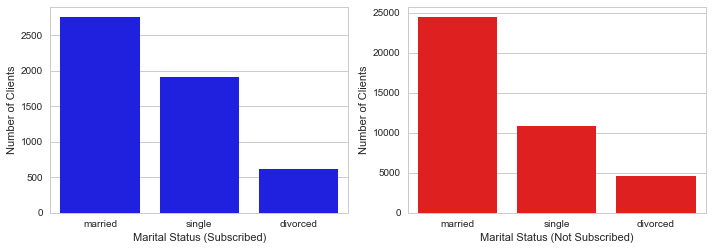

In [36]:
fig = plt.figure(figsize=(10, 10))

marital_histogram_subscribed = fig.add_subplot(321)
sns.countplot(
    x='marital', 
    data=bank_yes_subscribed, 
    color='blue',
    order=bank_full_data['marital'].value_counts().index)
marital_histogram_subscribed.set_xlabel('Marital Status (Subscribed)')
marital_histogram_subscribed.set_ylabel('Number of Clients')

marital_histogram_not_subscribed = fig.add_subplot(322)
sns.countplot(
    x='marital', 
    data=bank_no_subscribed, 
    color='red',    
    order=bank_full_data['marital'].value_counts().index)
marital_histogram_not_subscribed.set_xlabel('Marital Status (Not Subscribed)')
marital_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

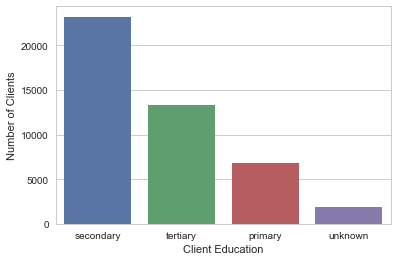

In [37]:
education_histogram = sns.countplot(
    x='education', 
    data=bank_full_data, 
    order=bank_full_data['education'].value_counts().index)
education_histogram.figure.set_size_inches(6, 4)
education_histogram.set_xlabel('Client Education')
education_histogram.set_ylabel('Number of Clients')

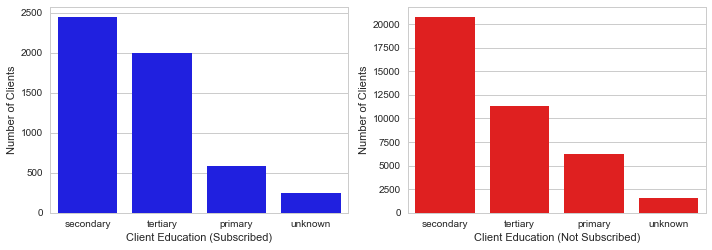

In [38]:
fig = plt.figure(figsize=(10, 10))

education_histogram_subscribed = fig.add_subplot(321)
sns.countplot(
    x='education', 
    data=bank_yes_subscribed, 
    color='blue',
    order=bank_full_data['education'].value_counts().index)
education_histogram_subscribed.set_xlabel('Client Education (Subscribed)')
education_histogram_subscribed.set_ylabel('Number of Clients')

education_histogram_not_subscribed = fig.add_subplot(322)
sns.countplot(
    x='education', 
    data=bank_no_subscribed, 
    color='red',    
    order=bank_full_data['education'].value_counts().index)
education_histogram_not_subscribed.set_xlabel('Client Education (Not Subscribed)')
education_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

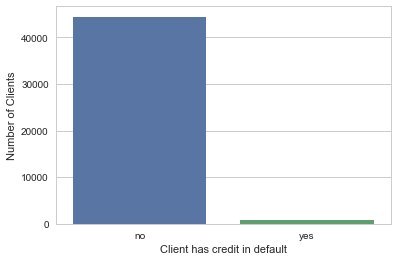

In [39]:
default_histogram = sns.countplot(
    x='default', 
    data=bank_full_data, 
    order=bank_full_data['default'].value_counts().index)
default_histogram.figure.set_size_inches(6, 4)
default_histogram.set_xlabel('Client has credit in default')
default_histogram.set_ylabel('Number of Clients')

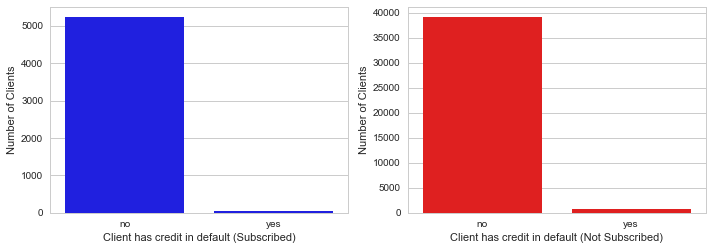

In [40]:
fig = plt.figure(figsize=(10, 10))

default_histogram_subscribed = fig.add_subplot(321)
sns.countplot(
    x='default', 
    data=bank_yes_subscribed, 
    color='blue',
    order=bank_full_data['default'].value_counts().index)
default_histogram_subscribed.set_xlabel('Client has credit in default (Subscribed)')
default_histogram_subscribed.set_ylabel('Number of Clients')

default_histogram_not_subscribed = fig.add_subplot(322)
sns.countplot(
    x='default', 
    data=bank_no_subscribed, 
    color='red',    
    order=bank_full_data['default'].value_counts().index)
default_histogram_not_subscribed.set_xlabel('Client has credit in default (Not Subscribed)')
default_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

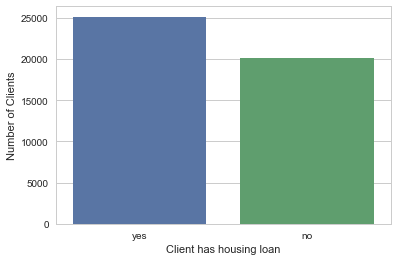

In [41]:
housing_histogram = sns.countplot(
    x='housing', 
    data=bank_full_data, 
    order=bank_full_data['housing'].value_counts().index)
housing_histogram.figure.set_size_inches(6, 4)
housing_histogram.set_xlabel('Client has housing loan')
housing_histogram.set_ylabel('Number of Clients')

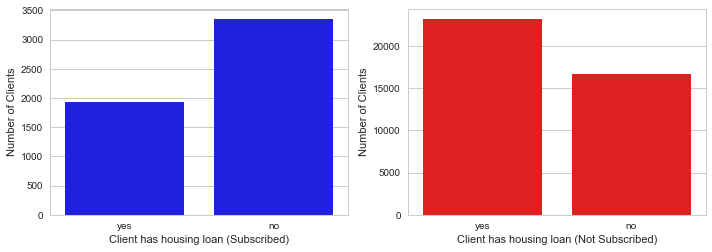

In [42]:
fig = plt.figure(figsize=(10, 10))

housing_histogram_subscribed = fig.add_subplot(321)
sns.countplot(
    x='housing', 
    data=bank_yes_subscribed, 
    color='blue',
    order=bank_full_data['housing'].value_counts().index)
housing_histogram_subscribed.set_xlabel('Client has housing loan (Subscribed)')
housing_histogram_subscribed.set_ylabel('Number of Clients')

housing_histogram_not_subscribed = fig.add_subplot(322)
sns.countplot(
    x='housing', 
    data=bank_no_subscribed, 
    color='red',    
    order=bank_full_data['housing'].value_counts().index)
housing_histogram_not_subscribed.set_xlabel('Client has housing loan (Not Subscribed)')
housing_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

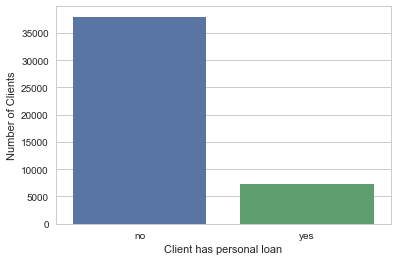

In [43]:
loan_histogram = sns.countplot(
    x='loan', 
    data=bank_full_data, 
    order=bank_full_data['loan'].value_counts().index)
loan_histogram.figure.set_size_inches(6, 4)
loan_histogram.set_xlabel('Client has personal loan')
loan_histogram.set_ylabel('Number of Clients')

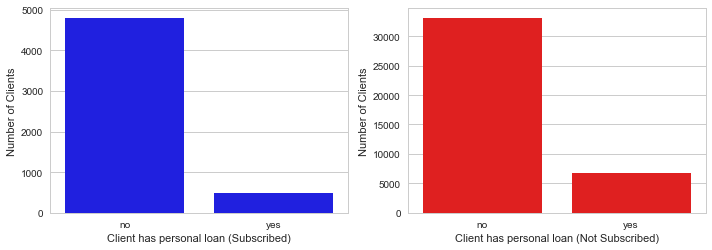

In [44]:
fig = plt.figure(figsize=(10, 10))

loan_histogram_subscribed = fig.add_subplot(321)
sns.countplot(
    x='loan', 
    data=bank_yes_subscribed, 
    color='blue',
    order=bank_full_data['loan'].value_counts().index)
loan_histogram_subscribed.set_xlabel('Client has personal loan (Subscribed)')
loan_histogram_subscribed.set_ylabel('Number of Clients')

loan_histogram_not_subscribed = fig.add_subplot(322)
sns.countplot(
    x='loan', 
    data=bank_no_subscribed, 
    color='red',    
    order=bank_full_data['loan'].value_counts().index)
loan_histogram_not_subscribed.set_xlabel('Client has personal loan (Not Subscribed)')
loan_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0,0.5,'Number of Clients')

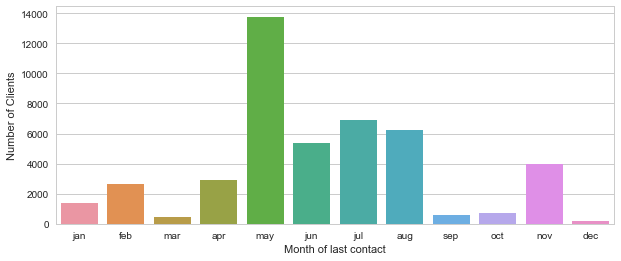

In [46]:
month_histogram = sns.countplot(
    x='month', 
    data=bank_full_data, 
    order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
month_histogram.figure.set_size_inches(10, 4)
month_histogram.set_xlabel('Month of last contact')
month_histogram.set_ylabel('Number of Clients')

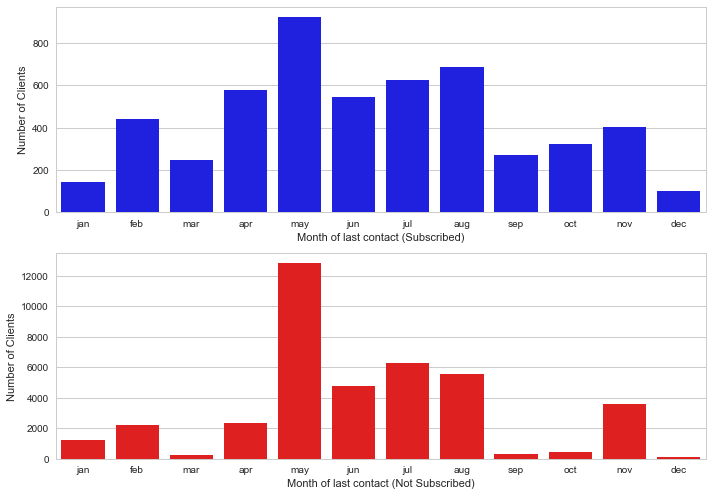

In [48]:
fig = plt.figure(figsize=(10, 10))

month_histogram_subscribed = fig.add_subplot(311)
sns.countplot(
    x='month', 
    data=bank_yes_subscribed, 
    color='blue',
    order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
month_histogram_subscribed.set_xlabel('Month of last contact (Subscribed)')
month_histogram_subscribed.set_ylabel('Number of Clients')

month_histogram_not_subscribed = fig.add_subplot(312)
sns.countplot(
    x='month', 
    data=bank_no_subscribed, 
    color='red',    
    order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
month_histogram_not_subscribed.set_xlabel('Month of last contact (Not Subscribed)')
month_histogram_not_subscribed.set_ylabel('Number of Clients')

plt.tight_layout()

Text(0.5,0.98,'Correlation Matrix')

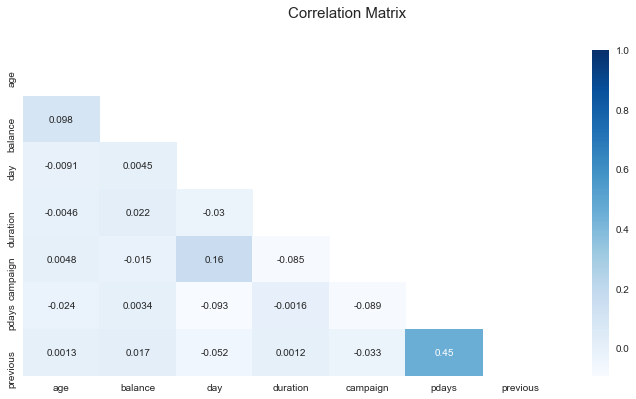

In [49]:
figure = plt.figure(figsize=(12, 6))
mask = np.zeros_like(bank_full_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(bank_full_data.corr(), mask=mask, annot=True, cmap="Blues")
figure.suptitle('Correlation Matrix', fontsize=15)